 # Titanic Survival Prediction Project

## 1. Introduction
In this notebook, we explore the Titanic dataset to understand the factors affecting survival, and build a model to predict survival of passengers.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Exploratory Data Analysis (EDA)
We visualize and analyze patterns in age, gender, class, etc.

## Load data

We load the data and store it in "data"

In [14]:
data= pd.read_csv("./train.csv")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Visualizations

We visualized the data to see the chances of survival based on gender, Pclass, age. fare and embarked point

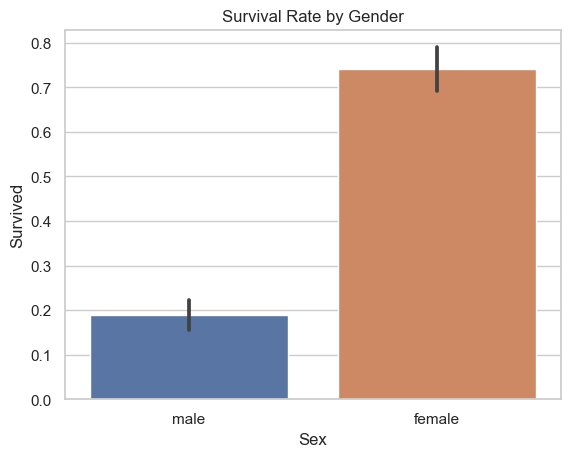

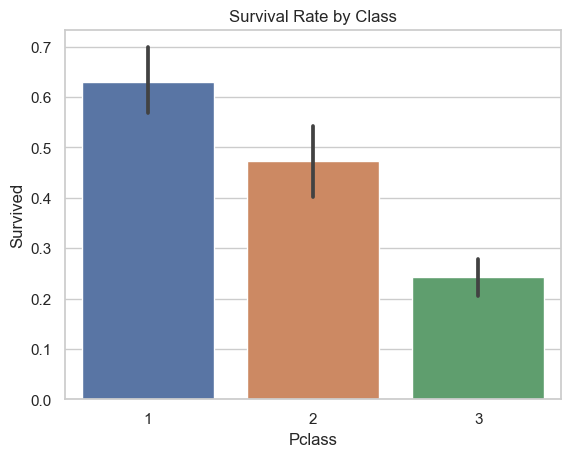

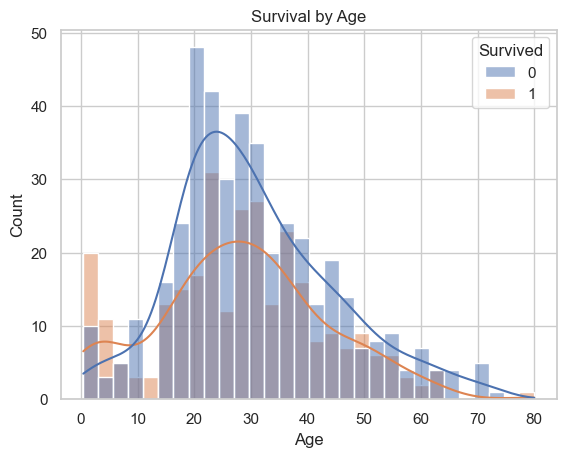

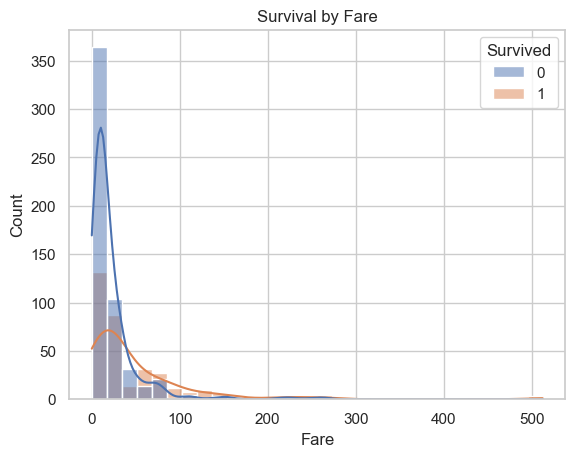

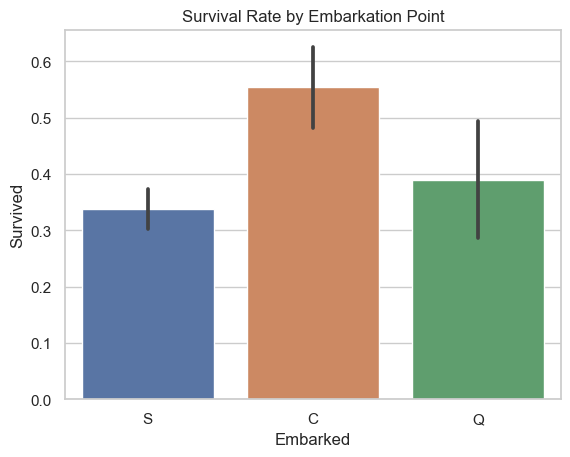

In [34]:
# Set plot style
sns.set(style="whitegrid")

# Gender survival
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()

# Pclass survival
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rate by Class")
plt.show()

# Age distribution
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival by Age")
plt.show()

# Fare distribution
sns.histplot(data=data, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Survival by Fare")
plt.show()

# Embarked
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title("Survival Rate by Embarkation Point")
plt.show()


# Insights

## Insight 1
We grouped the passengers based on "Pclass" "Sex", and "Embarked", and got the mean in order to see which passenger had a higher chance of survival based on the criteria

We can see that females in first class that embarked from "C" had the highest chance of surviving and males in third class that embarked from "S" had the least chance of surviving

In [37]:
data.groupby(["Pclass","Sex", "Embarked"])["Survived"].mean()

Pclass  Sex     Embarked
1       female  C           0.976744
                Q           1.000000
                S           0.958333
        male    C           0.404762
                Q           0.000000
                S           0.354430
2       female  C           1.000000
                Q           1.000000
                S           0.910448
        male    C           0.200000
                Q           0.000000
                S           0.154639
3       female  C           0.652174
                Q           0.727273
                S           0.375000
        male    C           0.232558
                Q           0.076923
                S           0.128302
Name: Survived, dtype: float64

In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Insight 2
 We later on check to see if the fare a passenger paid, had a role to play in if the passenger will survive or not.
Based on this, we can conclude that passengers who paid higher fare i.e [31, 512.22] had a higher chance of surviving that passengers who paid a lower fare e.g People who paid [-0.001, 7.92] had the least chance of surviving

In [25]:
data["FarePaid"] = pd.qcut(data["Fare"],4)

In [26]:
data.groupby("FarePaid")["Survived"].mean()

FarePaid
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

## Insight 3
We have to check if the cabin a passenger was in had an influence on his/her chances of survival

In [28]:
data["Deck"] = data["Cabin"].astype(str).str[0]

In [29]:
data.groupby("Deck")["Survived"].mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

# Feature Engineering

Based on the insights gained so far,we can create new features which will aid in understanding the data more and a passenger's chances of survival

## Feature 1
We can create a "Sex_Pclass" feature which will create a new row with the passenger's sex and Pclass.
E.g male_3 means the passenger was a male and was on third class and female_1 means the passenger was a female and was on first class

In [18]:
data["Sex_Pclass"] = data["Sex"] + "_" + data["Pclass"].astype(str)

In [20]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male_3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male_1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,male_3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female_3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female_2


## Feature 2
We cam the create an AgeGroup feature to better understand and visualize the data by writing a function which will classify a passenger as either a child, teen. adult or senior based on the passenger's age

In [21]:
#Function to classify a passenger as "child", "teen", "adult" or "senior"

def age_group(age):
    if age < 13:
        return "child"
    elif age < 20:
        return "teen"
    elif age < 60:
        return "adult"
    else:
        return "senior"

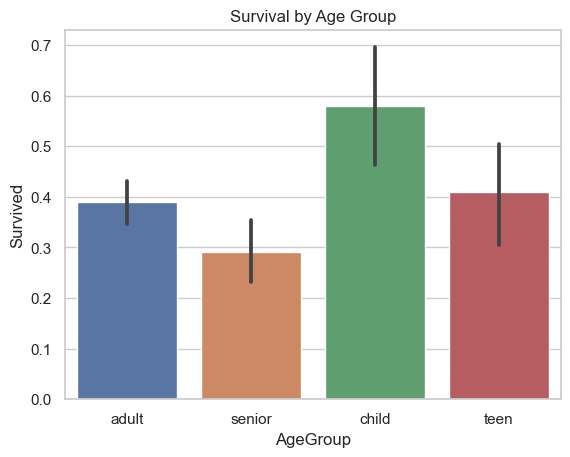

In [38]:
#Plot to see which age group is more likely to survive

data["AgeGroup"] = data["Age"].apply(age_group)
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title("Survival by Age Group")
plt.show()

In [24]:
data.groupby("AgeGroup")["Survived"].mean()

AgeGroup
adult     0.389313
child     0.579710
senior    0.290640
teen      0.410526
Name: Survived, dtype: float64

In [30]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,AgeGroup,FarePaid,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,adult,"(-0.001, 7.91]",n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,adult,"(31.0, 512.329]",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,adult,"(7.91, 14.454]",n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,adult,"(31.0, 512.329]",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,adult,"(7.91, 14.454]",n
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male_3,senior,"(7.91, 14.454]",n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male_1,adult,"(31.0, 512.329]",E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,male_3,child,"(14.454, 31.0]",n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female_3,adult,"(7.91, 14.454]",n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female_2,teen,"(14.454, 31.0]",n


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Sex_Pclass   891 non-null    object  
 13  AgeGroup     891 non-null    object  
 14  FarePaid     891 non-null    category
 15  Deck         891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(8)
memory usage: 105.6+ KB
